In [4]:
import numpy as np
import numpy.random as rd
import jax
from jax import numpy as jnp
from jax.numpy import linalg as jla
import matplotlib.pyplot as plt
from env.mdp import MarkovDecisionProcess,Sampler
from env.gridworld import Gridworld, gridplot
from env.complete import Complete
from algs.projs import euclidean_l1ball, euclidean_simplex, euclidian_pos_orthant
from algs.lps import unregCMDPLP
from typing import Tuple
from itertools import accumulate
from einops import rearrange
Point = Tuple[int,int]
Goal = Tuple[Point,float]

key = jax.random.PRNGKey(0) 

from algs.utils import flatten

### Solving unregularized CMDPS with the LP formulation

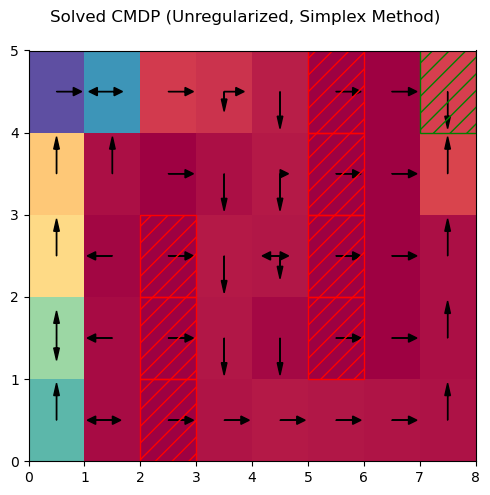

In [5]:
goals = [((7,4),100)]
obstacles = [(2,0),(2,1),(2,2),(5,1),(5,2),(5,3),(5,4)]
gridMDP = Gridworld(8,5,0.1,0.9,goals=goals,obstacles=obstacles) #build a "wall of obstacles"
gridMDP.Psi = gridMDP.Psi*1000
solver = unregCMDPLP(gridMDP)
mu = solver.solve()
sz = 5.
mu_s = np.sum(mu,axis=1)
fig, ax = plt.subplots(1,1,figsize=(sz,sz))
plot = np.average(gridMDP.states2grid(mu),axis=2)
gridplot(gridMDP,ax,mu_s,stochastic_policy=solver.recover_stochastic_policy(),obstacles=obstacles,goals=goals)
fig.suptitle('Solved CMDP (Unregularized, Simplex Method)')
fig.tight_layout()

[((DeviceArray(0, dtype=int32), DeviceArray(0, dtype=int32)), 2, 0), ((DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32)), 3, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(0, dtype=int32)), 2, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(1, dtype=int32)), 2, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(2, dtype=int32)), 2, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(3, dtype=int32)), 2, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(4, dtype=int32)), 0, 0.0), ((DeviceArray(1, dtype=int32), DeviceArray(4, dtype=int32)), 1, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(4, dtype=int32)), 0, 0.0), ((DeviceArray(1, dtype=int32), DeviceArray(4, dtype=int32)), 1, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(4, dtype=int32)), 0, 0.0), ((DeviceArray(1, dtype=int32), DeviceArray(4, dtype=int32)), 1, 0.0), ((DeviceArray(0, dtype=int32), DeviceArray(4, dtype=int32)), 0, 0.0), ((DeviceArray(1, dtype=int32), DeviceArray(4, dtype=int32)), 1, 0.0), ((DeviceArray(0, dtyp

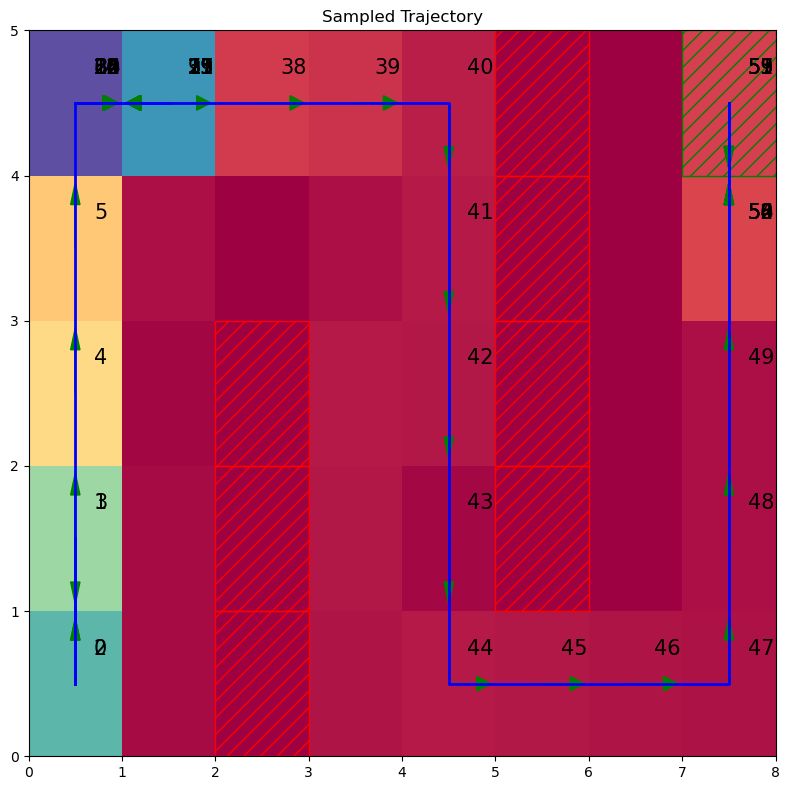

In [6]:
smp = Sampler(gridMDP,key)

""" Get the initial state """
traj = []
r_t = 0
s_t = smp.reset()
for i in range(60):
    a_t = rd.choice(np.arange(4), p = solver.recover_stochastic_policy()[s_t]) 
    traj += [(gridMDP.state2point(s_t),a_t,r_t)]
    s_t, r_t = smp.step(a_t)

traj


print(traj)
fig, ax = plt.subplots(1,1,figsize=(8,8))
gridplot(gridMDP, ax, scalar=mu_s, traj=traj, goals=goals, obstacles=obstacles)
ax.set_title('Sampled Trajectory')
fig.tight_layout()
plt.show()